In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import time

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
from tensorflow.keras import Input

In [ ]:
nn_model = Sequential([
    Input(shape=(28,28)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
start = time.time()
nn_model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1, verbose=2)
nn_time = time.time() - start

Epoch 1/5
422/422 - 4s - 10ms/step - accuracy: 0.8997 - loss: 0.3606 - val_accuracy: 0.9562 - val_loss: 0.1581
Epoch 2/5
422/422 - 2s - 5ms/step - accuracy: 0.9554 - loss: 0.1506 - val_accuracy: 0.9702 - val_loss: 0.1026
Epoch 3/5
422/422 - 3s - 6ms/step - accuracy: 0.9681 - loss: 0.1042 - val_accuracy: 0.9732 - val_loss: 0.0865
Epoch 4/5
422/422 - 3s - 6ms/step - accuracy: 0.9759 - loss: 0.0774 - val_accuracy: 0.9747 - val_loss: 0.0883
Epoch 5/5
422/422 - 3s - 8ms/step - accuracy: 0.9806 - loss: 0.0628 - val_accuracy: 0.9758 - val_loss: 0.0796


In [ ]:
nn_loss, nn_acc = nn_model.evaluate(x_test, y_test, verbose=0)
print(f"NN Accuracy: {nn_acc:.4f}, Time: {nn_time:.2f}s, Params: {nn_model.count_params()}")

NN Accuracy: 0.9734, Time: 16.18s, Params: 109386


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [ ]:
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

In [ ]:
from tensorflow.keras import Input

In [ ]:
cnn_model = Sequential([
    Input(shape=(28,28,1)),
    Conv2D(32, (3,3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
start = time.time()
cnn_model.fit(x_train_cnn, y_train, epochs=5, batch_size=128, validation_split=0.1, verbose=2)
cnn_time = time.time() - start

Epoch 1/5
422/422 - 127s - 300ms/step - accuracy: 0.9827 - loss: 0.0567 - val_accuracy: 0.9877 - val_loss: 0.0461
Epoch 2/5
422/422 - 124s - 295ms/step - accuracy: 0.9901 - loss: 0.0312 - val_accuracy: 0.9882 - val_loss: 0.0471
Epoch 3/5
422/422 - 142s - 337ms/step - accuracy: 0.9933 - loss: 0.0198 - val_accuracy: 0.9905 - val_loss: 0.0357
Epoch 4/5
422/422 - 124s - 293ms/step - accuracy: 0.9953 - loss: 0.0139 - val_accuracy: 0.9903 - val_loss: 0.0407
Epoch 5/5
422/422 - 144s - 341ms/step - accuracy: 0.9974 - loss: 0.0082 - val_accuracy: 0.9893 - val_loss: 0.0434


In [ ]:
start = time.time()
cnn_loss, cnn_acc = cnn_model.evaluate(x_test_cnn, y_test, verbose=0)
cnn_time = time.time() - start
print(f"CNN Accuracy: {cnn_acc:.4f}, Time: {cnn_time:.2f}s, Params: {cnn_model.count_params()}")

CNN Accuracy: 0.9899, Time: 10.32s, Params: 1199882


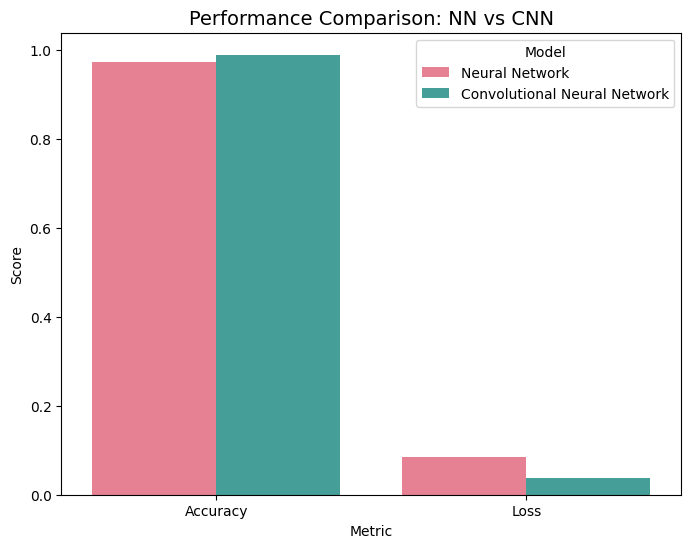

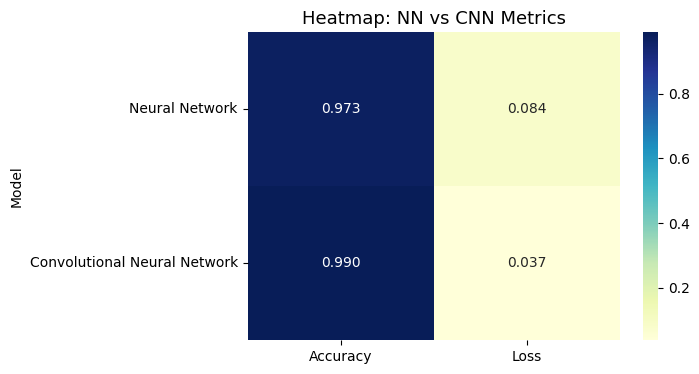

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

nn_loss, nn_acc = nn_model.evaluate(x_test, y_test, verbose=0)
cnn_loss, cnn_acc = cnn_model.evaluate(x_test_cnn, y_test, verbose=0)

results = pd.DataFrame({
    "Model": ["Neural Network", "Convolutional Neural Network"],
    "Accuracy": [nn_acc, cnn_acc],
    "Loss": [nn_loss, cnn_loss]
})

plt.figure(figsize=(8,6))
sns.barplot(
    data=results.melt(id_vars="Model", var_name="Metric", value_name="Score"),
    x="Metric", y="Score", hue="Model", palette="husl"
)
plt.title("Performance Comparison: NN vs CNN", fontsize=14)
plt.ylabel("Score")
plt.xlabel("Metric")
plt.legend(title="Model")
plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(results.set_index("Model"), annot=True, cmap="YlGnBu", fmt=".3f", cbar=True)
plt.title("Heatmap: NN vs CNN Metrics", fontsize=13)
plt.show()